In [757]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from cycler import cycler



In [3]:
def read_file(filename):
    df = pd.read_csv(filename)
    df['timestamp'] = pd.to_datetime(df['timestamp'])
    df.set_index('timestamp', inplace=True)
    return df

In [4]:
df1 = read_file('LUZ01_engineered_features.csv')
df2 = read_file('LUZ02_engineered_features.csv')
df4 = read_file('LUZ04_engineered_features.csv')
df7 = read_file('LUZ07_engineered_features.csv')
df8 = read_file('LUZ08_engineered_features.csv')

In [5]:
df_list = [df1, df2, df4, df7, df8]

In [6]:
df1.columns

Index(['heart_rate', 'heart_rate_variability', 'active_energy',
       'respiratory_rate', 'step_count', 'blood_oxygen_saturation', 'glucose',
       'sleep', 'manual_glucose', 'meal', 'insulin_short', 'insulin_long',
       'day_night', 'hr_centred', 'hrcentred_5min_rolling',
       'hrcentred_10min_rolling', 'hrcentred_30min_rolling',
       'hrcentred_60min_rolling', 'hr_5min_rolling', 'hr_10min_rolling',
       'hr_30min_rolling', 'hr_60min_rolling', 'hrv_centred',
       'last_measured_hrv_15min_centred',
       'hrv_abs_deviation_from_median_centred', 'hrv_change_15min_centred',
       'abs_hrv_change_15min_centred', 'last_measured_hrv_15min',
       'hrv_change_15min', 'abs_hrv_change_15min', 'bl_ox_centred',
       'last_measured_ox_centred', 'last_measured_ox', 'rr_centred',
       'last_measured_rr_centred', 'last_measured_rr',
       'step_count_rollingsum_5min', 'step_count_rollingsum_10min',
       'step_count_rollingsum_30min', 'step_count_rollingsum_60min',
       'activ

# HR

In [128]:
hr_range_list = []

for df in df_list:
    hr_range = dict()
    hr_range['id'] = df.patient_code[0]
    hr_range['hr_min'] = int(df.heart_rate.min())
    hr_range['hr_max'] = int(df.heart_rate.max())
    hr_range['hr_median'] = int(df.heart_rate.median())
    hr_range_list.append(hr_range)
    
pd.DataFrame(hr_range_list)

,id,hr_min,hr_max,hr_median
0,LUZ01,47,195,72
1,LUZ02,59,167,87
2,LUZ04,43,182,70
3,LUZ07,54,177,73
4,LUZ08,38,172,54


Text(0.5, 0.98, 'Heart rate range difference between awake and sleep states')

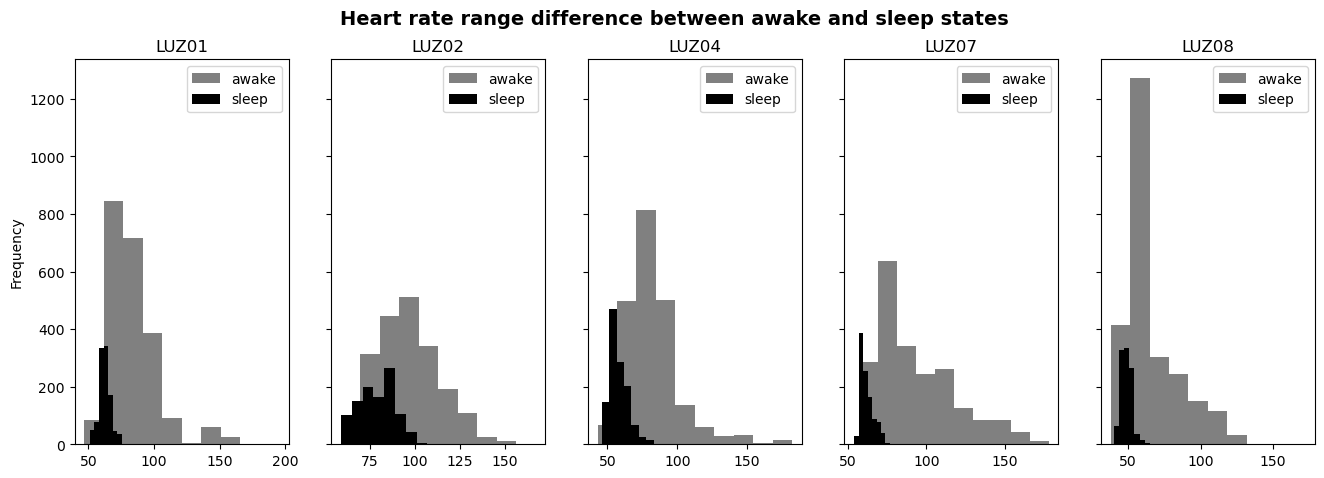

In [796]:
fig, axs = plt.subplots(1,5, figsize=(16,5), sharex=False, sharey=True)
axs= axs.ravel()

for i, df in enumerate(df_list):
    #df.heart_rate.hist(ax=axs[i], grid=True, bins=20)
    plt.rc('axes', prop_cycle=(cycler('color', ['gray', 'black'])))
    df.groupby('sleep').heart_rate.plot(kind='hist', ax=axs[i])
    #axs[i].scatter(df.index, df.hr_5min_rolling, c= df['sleep'].map(colors))
    axs[i].set_title(df.patient_code[0])
    axs[i].legend(labels=['awake', 'sleep'])
    #axs[i].set_xticks([])
    #axs[i].hlines(df.heart_rate.median(), df.index.min(), df.index.max(), color='r')

fig.suptitle('Heart rate range difference between awake and sleep states', fontsize=14, fontweight='bold')

In [ ]:
fig, axs = plt.subplots(1,5, figsize=(16,5), sharex=False, sharey=True)
axs= axs.ravel()

for i, df in enumerate(df_list):
    df = df[(df.sleep==1) & (df.glucose > 3.5)]
    sns.regplot(x=df.glucose, y=df.heart_rate, ax=axs[i], line_kws={'color': 'red'})


Text(0.08, 0.5, 'Heart Rate')

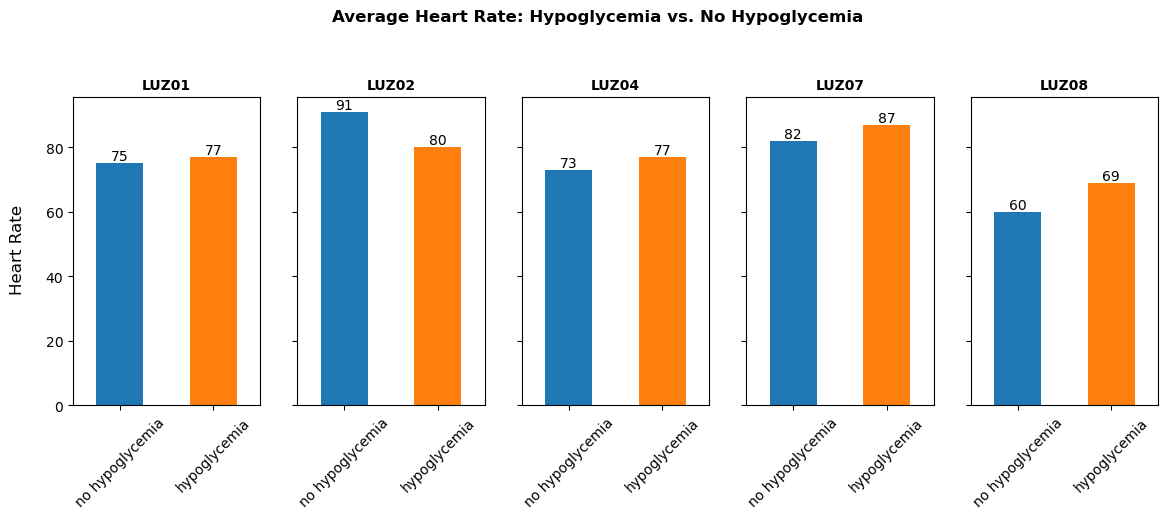

In [423]:
fig, axs = plt.subplots(1,5, figsize=(14,4), sharex=False, sharey=True)
axs= axs.ravel()

for i, df in enumerate(df_list):
    #df = df[(df.cgm < 13)]
    #sns.regplot(x=df.cgm, y=df.heart_rate_variability, ax=axs[i], line_kws={'color': 'red'})
    df.groupby(['hypoglycemia']).heart_rate.mean().astype('int').plot(kind='bar', ax=axs[i], color=['tab:blue', 'tab:orange'])
    axs[i].bar_label(axs[i].containers[0])
    axs[i].set_xticklabels(['no hypoglycemia', 'hypoglycemia'], rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_title(df.patient_code[0], fontsize=10, fontweight='bold')
    
fig.suptitle('Average Heart Rate: Hypoglycemia vs. No Hypoglycemia', fontsize=12, fontweight='bold', y=1.1)
fig.supylabel('Heart Rate', x=0.08)

# HRV

Text(0.08, 0.5, 'Heart Rate Variability')

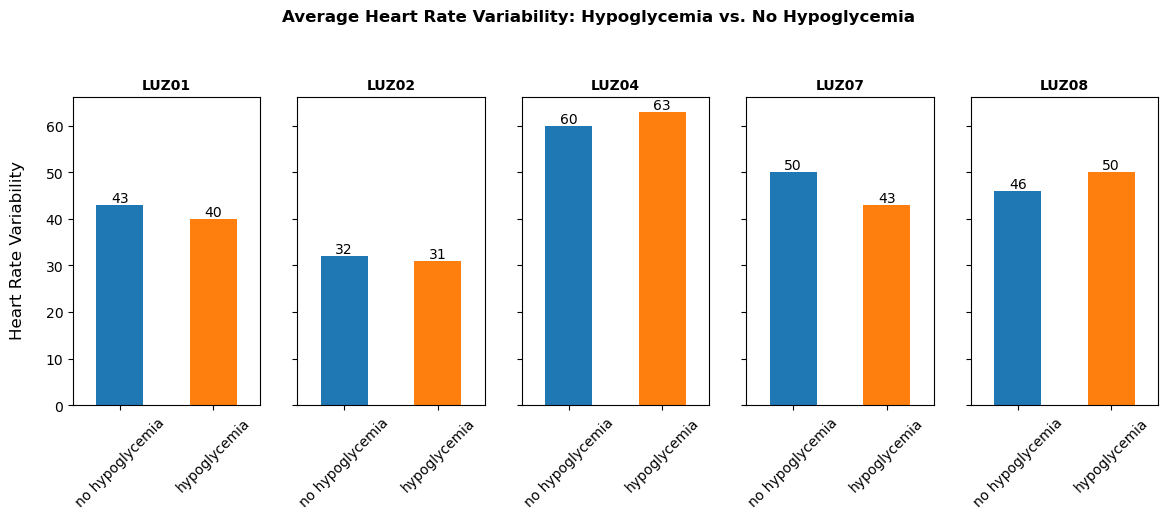

In [422]:
fig, axs = plt.subplots(1,5, figsize=(14,4), sharex=False, sharey=True)
axs= axs.ravel()

for i, df in enumerate(df_list):
    #df = df[(df.cgm < 13)]
    #sns.regplot(x=df.cgm, y=df.heart_rate_variability, ax=axs[i], line_kws={'color': 'red'})
    df.groupby(['hypoglycemia']).heart_rate_variability.mean().astype('int').plot(kind='bar', ax=axs[i], color=['tab:blue', 'tab:orange'])
    axs[i].bar_label(axs[i].containers[0])
    axs[i].set_xticklabels(['no hypoglycemia', 'hypoglycemia'], rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_title(df.patient_code[0], fontsize=10, fontweight='bold')
    
fig.suptitle('Average Heart Rate Variability: Hypoglycemia vs. No Hypoglycemia', fontsize=12, fontweight='bold', y=1.1)
fig.supylabel('Heart Rate Variability', x=0.08)

# Steps and activity

[Text(0, 0, 'LUZ01'),
 Text(1, 0, 'LUZ02'),
 Text(2, 0, 'LUZ04'),
 Text(3, 0, 'LUZ07'),
 Text(4, 0, 'LUZ08')]

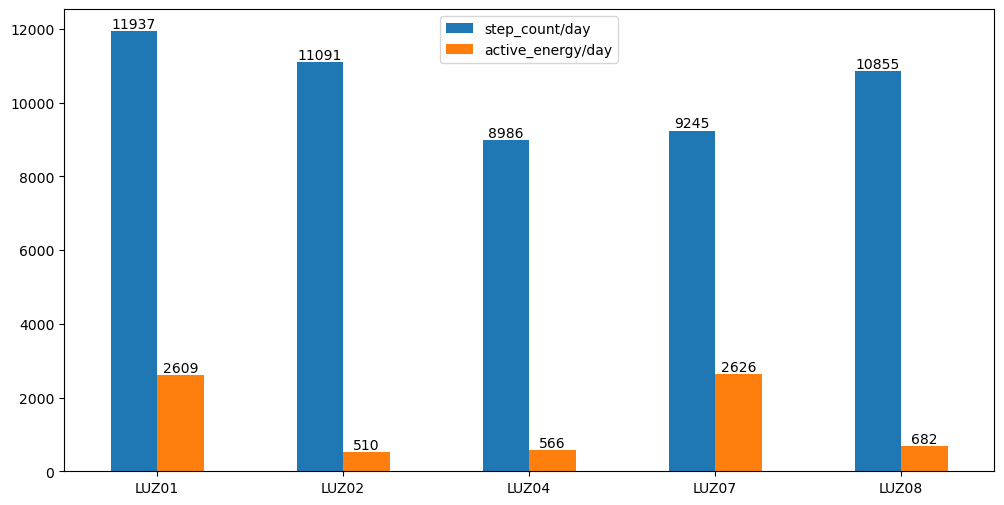

In [429]:
fig, ax = plt.subplots(figsize=(12,6))

count_list = []

for i, df in enumerate(df_list):
    count_dict = {}
    #df = df[(df.cgm < 13)]
    #sns.regplot(x=df.cgm, y=df.heart_rate_variability, ax=axs[i], line_kws={'color': 'red'})
    step_count_day = df.groupby(df.index.day).step_count.sum().astype('int')
    active_energy_day = df.groupby(df.index.day).active_energy.sum().astype('int')
    count_dict['id'] = df.patient_code[0]
    count_dict['mean_step_count_per_day']= step_count_day.mean().astype('int')
    count_dict['mean_active_energy_per_day']= active_energy_day.mean().astype('int')
    count_list.append(count_dict)
    #axs[i].bar_label(axs[i].containers[0])
    #axs[i].set_xticklabels(['no hypoglycemia', 'hypoglycemia'])
    #axs[i].set_xlabel('')
    #axs[i].set_title(df.patient_code[0], fontsize=10, fontweight='bold')
    
#fig.suptitle('Average Heart Rate: Hypoglycemia vs. No Hypoglycemia', fontsize=12, fontweight='bold', y=1.1)
#fig.supylabel('Heart Rate', x=0.08)

activity_df = pd.DataFrame(count_list)
activity_df.plot(kind='bar', ax=ax)
ax.legend(['step_count/day', 'active_energy/day'], loc='upper center')
ax.bar_label(ax.containers[0])
ax.bar_label(ax.containers[1])
ax.set_xticklabels(activity_df.id, rotation=0)

[Text(0, 0, '2351.5'),
 Text(0, 0, '480'),
 Text(0, 0, '567'),
 Text(0, 0, '2259'),
 Text(0, 0, '589.5')]

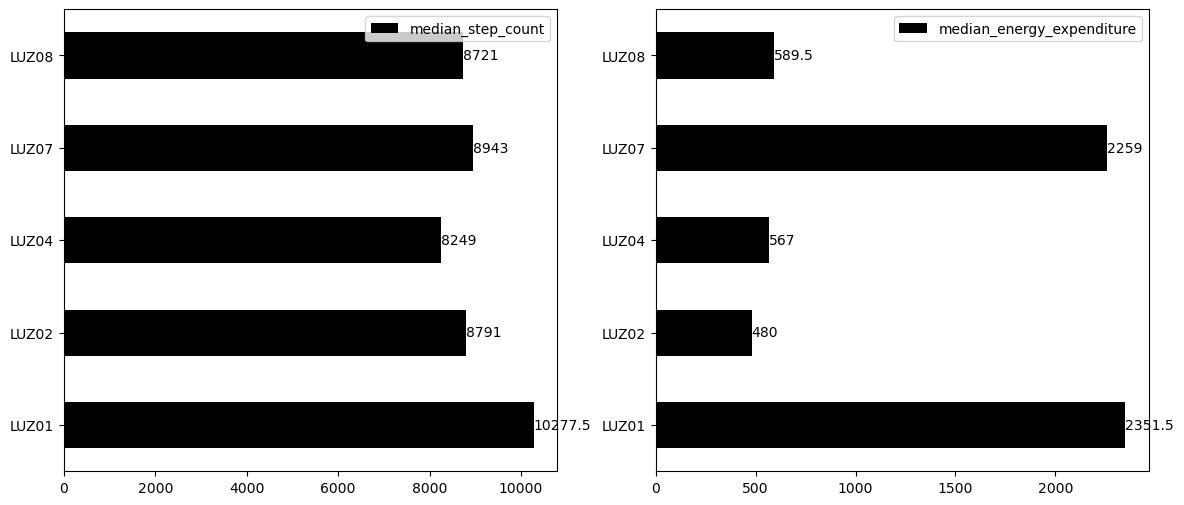

In [785]:
import statistics

step_count_list = []
energy_list = []

for df in df_list: 
    day_count_list = []
    energy_count_list = [] 
    for day in set(df.index.day):
        step_count_dict = {}
        energy_count_dict = {}
        day_count = df[df.index.day == day].step_count.sum().round()
        energy_count = df[df.index.day == day].active_energy.sum().round()
        day_count_list.append(day_count)
        energy_count_list.append(energy_count)
        step_count_dict['id'] = df.patient_code[0] 
        step_count_dict['median_step_count'] = statistics.median(day_count_list)
        energy_count_dict['id'] = df.patient_code[0] 
        energy_count_dict['median_energy_expenditure'] = statistics.median(energy_count_list)

    step_count_list.append(step_count_dict)
    energy_list.append(energy_count_dict)

    
step_count_list    
energy_list
fig, axs = plt.subplots(1,2, figsize=(14,6), sharex=False)

pd.DataFrame(step_count_list).plot(kind='barh', ax=axs[0], color='black')
axs[0].set_yticklabels(pd.DataFrame(step_count_list).id)
axs[0].bar_label(axs[0].containers[0])

pd.DataFrame(energy_list).plot(kind='barh', ax=axs[1], color='black')
axs[1].set_yticklabels(pd.DataFrame(energy_list).id)
axs[1].bar_label(axs[1].containers[0])

# RR and SPO2

Text(0.08, 0.5, 'Respiratory Rate')

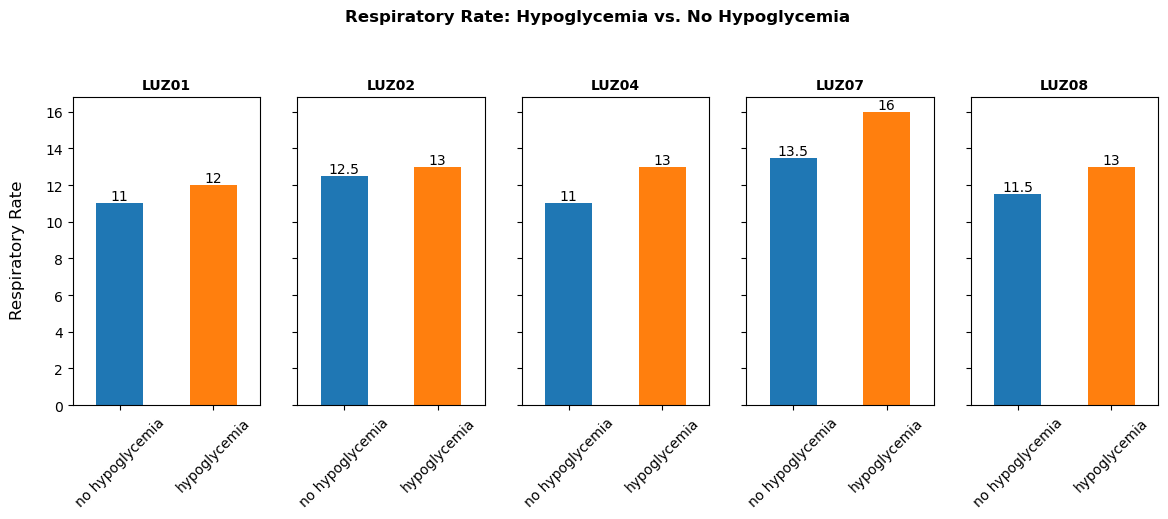

In [550]:
fig, axs = plt.subplots(1,5, figsize=(14,4), sharex=False, sharey=True)
axs= axs.ravel()

for i, df in enumerate(df_list):
    df = df[(df.sleep == 1) & (df.hypo_duration < 180)]
    #sns.regplot(x=df.cgm, y=df.heart_rate_variability, ax=axs[i], line_kws={'color': 'red'})
    df.groupby(['hypoglycemia']).last_measured_rr.min().round(2).plot(kind='bar', ax=axs[i], color=['tab:blue', 'tab:orange'])
    axs[i].bar_label(axs[i].containers[0])
    axs[i].set_xticklabels(['no hypoglycemia', 'hypoglycemia'], rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_title(df.patient_code[0], fontsize=10, fontweight='bold')
    
fig.suptitle('Respiratory Rate: Hypoglycemia vs. No Hypoglycemia', fontsize=12, fontweight='bold', y=1.1)
fig.supylabel('Respiratory Rate', x=0.08)

Text(0.08, 0.5, 'Blood Oxygen Saturation')

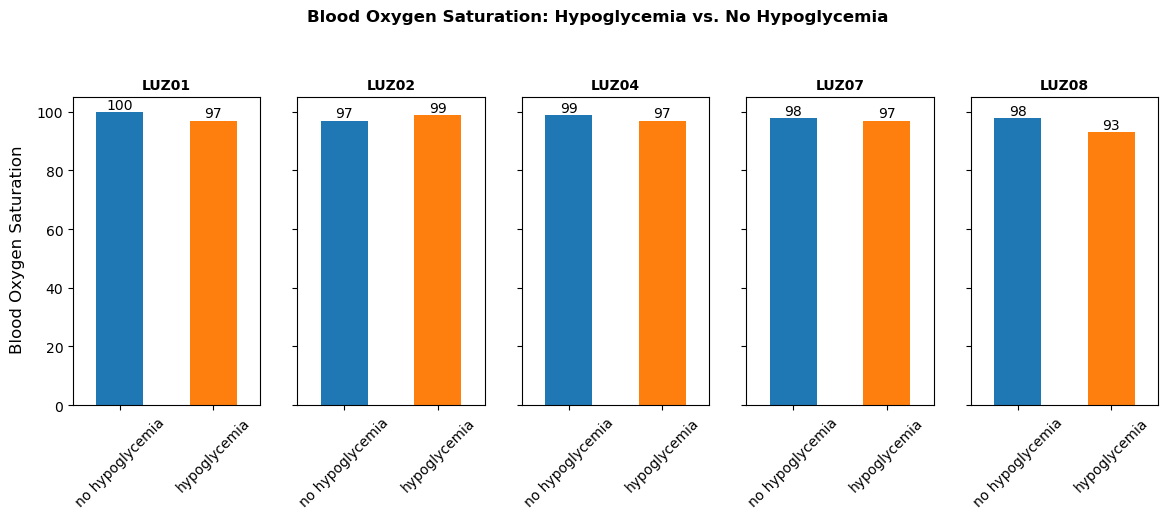

In [501]:
fig, axs = plt.subplots(1,5, figsize=(14,4), sharex=False, sharey=True)
axs= axs.ravel()

for i, df in enumerate(df_list):
    df = df[(df.sleep == 1) & (df.hypo_duration < 180)]
    #sns.regplot(x=df.cgm, y=df.heart_rate_variability, ax=axs[i], line_kws={'color': 'red'})
    df.groupby(['hypoglycemia']).last_measured_ox.max().round(2).plot(kind='bar', ax=axs[i], color=['tab:blue', 'tab:orange'])
    axs[i].bar_label(axs[i].containers[0])
    axs[i].set_xticklabels(['no hypoglycemia', 'hypoglycemia'], rotation=45)
    axs[i].set_xlabel('')
    axs[i].set_title(df.patient_code[0], fontsize=10, fontweight='bold')
    
fig.suptitle('Blood Oxygen Saturation: Hypoglycemia vs. No Hypoglycemia', fontsize=12, fontweight='bold', y=1.1)
fig.supylabel('Blood Oxygen Saturation', x=0.08)

# CGM

Text(0.5, 1, 'Glucose Level Distribution/Participant')

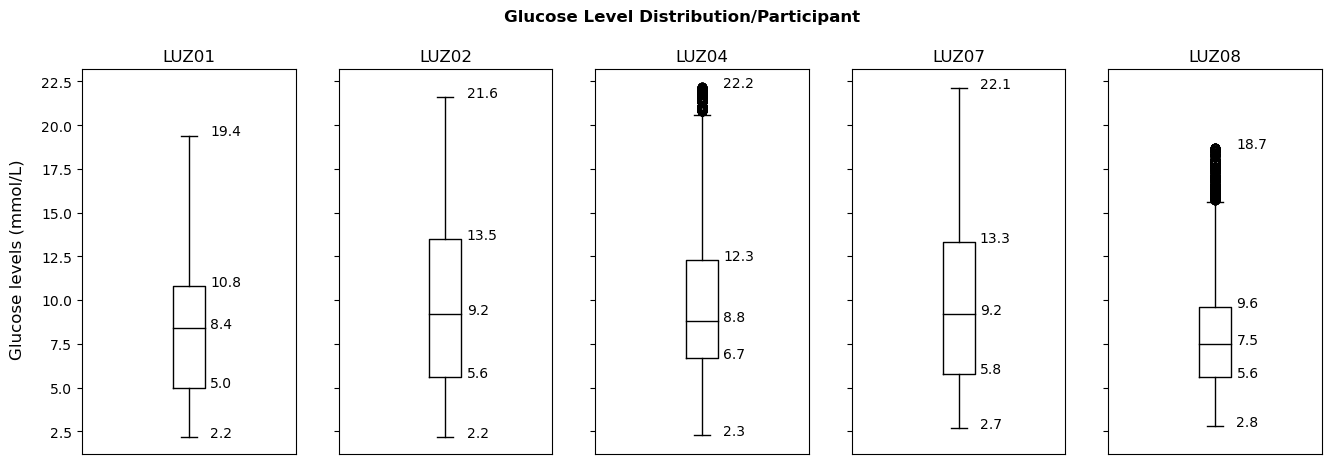

In [797]:
fig, axs = plt.subplots(1, 5, figsize=(16,5), sharey=True)
axs = axs.ravel()

for i, df in enumerate(df_list):
    df.cgm.plot(kind='box', ax=axs[i], showfliers=True, color='black')
    axs[i].set_title(df.patient_code[0])
    axs[i].set_xticklabels('')
    axs[i].set_xticks([])
    axs[i].text(x= 1.1, y=df.cgm.median(), s=str(df.cgm.median()))
    axs[i].text(x= 1.1, y=df.cgm.min(), s=str(df.cgm.min()))
    axs[i].text(x= 1.1, y=df.cgm.max(), s=str(df.cgm.max()))
    axs[i].text(x= 1.1, y=df.cgm.quantile(0.25), s=str(df.cgm.quantile(0.25)))
    axs[i].text(x= 1.1, y=df.cgm.quantile(0.75), s=str(df.cgm.quantile(0.75)))

fig.supylabel('Glucose levels (mmol/L)', x=0.08)
fig.suptitle('Glucose Level Distribution/Participant', fontsize=12, fontweight='bold', y=1)